In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'11': 556, '10': 257, '00': 211}


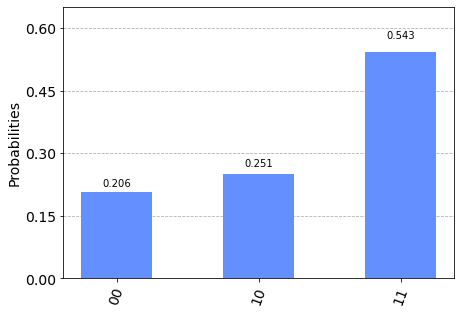

In [2]:
x = QuantumRegister(2)
y = QuantumRegister(2)
c = ClassicalRegister(2, "c")
qc = QuantumCircuit(x, y, c, name="test_func")

qc.h(x)

# pol = x^0x^0 + x^0x^1 + x^1x^0 + x^1x^1, onde x^0x^0 = 1

# p/ y1
#x00 => e00, p00 = (1,1,1,1)
qc.ccx(x[1],x[0],y[1])
qc.cx(x[1],y[1])
qc.cx(x[0],y[1])
qc.x(y[1])

#x01 => e01, p01 = (0,1,0,1)
#y1.CCX(x1,x2)
#y1.CX(x2)

#x10 => e10, p10 = (0,0,1,1)
qc.ccx(x[1],x[0],y[1])
qc.cx(x[0],y[1])

#x11 => e11, p11 = (0,0,0,1)
qc.ccx(x[1],x[0],y[1])

# p/ y0
#e00
qc.ccx(x[1],x[0],y[0])
qc.cx(x[1],y[0])
qc.cx(x[0],y[0])
qc.x(y[0])

#e10
qc.ccx(x[1],x[0],y[0])
qc.cx(x[0],y[0])

qc.measure(y[1], c[1])
qc.measure(y[0], c[0])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

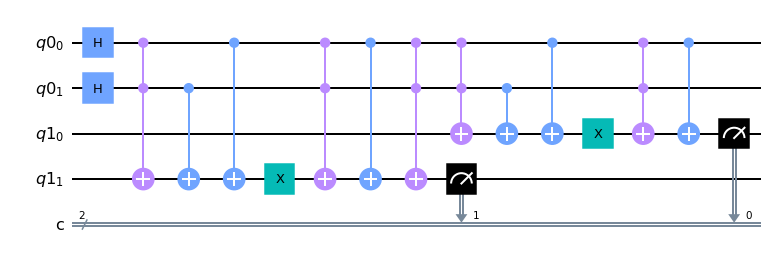

In [3]:
qc.draw(output='mpl')